<a href="https://colab.research.google.com/github/mhoch123/MAT422/blob/main/Homework_3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3.7
Authors: Megan Hoch and Bronwyn Curnow

#3.7.1. Mathematical formulation

In neural networks, the weights, the $w_i$, and the basis, $b$, will be found numerically in order to best fir our forecast output with our given data.

**Neural Network Formula:** $a^{(l)} = \sigma(z^{(l)} = \sigma(W^{(l)} a^{(l-1)}+b^{(l)})$


#3.7.2. Activation functions

In neural networks, the activation function of a node abstracts the output of that node given an input or set of inputs for specific purposes. $\sigma$ represents the activation function.

**Heaviside Step Function:**
$\sigma (x)
\left\{ \begin{array}{rcl}
0 & \mbox{$x<0$} \\ 1 & \mbox{$x \geq 0$}
\end{array}\right.$

This often represents a signal that switches on at a specified time.

**Positive Linear/ReLU Function:** $ \sigma (x) = max(0,x)$

**Sigmoid:** $\sigma(x) = \frac{1}{1+e^{-x}}$


#3.7.3. Cost function

**Cost Function:** $ J = - \sum_{n=1}^{N} (y^{(n)}ln(\hat{y}^{(n)}) + (1-y^{(n)}) ln(1-\hat{y}^{(n)}))$

#3.7.4. Backpropagation

Back-propagation is the essence of neural network training. It is the practice of fine tuning the weights based on the error rate obtained in the previous iteration. The derivative of the cost function can be written as:

$\frac{\partial J}{\partial b_{j'}^{(l)}} = \delta_{j'}^{(l)}$

#3.7.5. Backpropagation algorithm

**Back-Propagation Algorithm:**  New $b_{j'}^{(l)}$ = Old $ b_{j'}^{(l)} - \beta \frac{\partial J}{\partial b_{j'}^{(l)}} =$ Old $b_{j'}^{(l)} - \beta \delta_{j'}^{(l)}$

Epoch 100/1000, Loss: 0.1480
Epoch 200/1000, Loss: 0.1453
Epoch 300/1000, Loss: 0.1441
Epoch 400/1000, Loss: 0.1438
Epoch 500/1000, Loss: 0.1437
Epoch 600/1000, Loss: 0.1435
Epoch 700/1000, Loss: 0.1435
Epoch 800/1000, Loss: 0.1434
Epoch 900/1000, Loss: 0.1433
Epoch 1000/1000, Loss: 0.1432


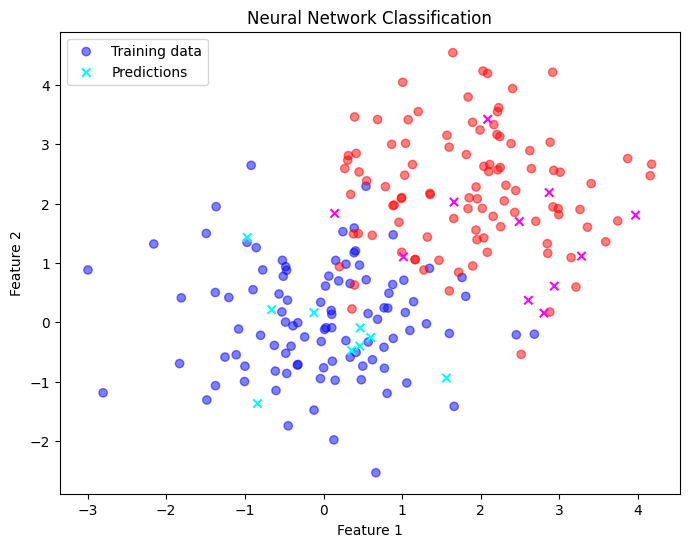

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

def generate_data(n=100):
    x_class0 = np.random.normal(0, 1, (n, 2))
    y_class0 = np.zeros((n, 1))

    x_class1 = np.random.normal(2, 1, (n, 2))
    y_class1 = np.ones((n, 1))

    X = np.vstack((x_class0, x_class1))
    y = np.vstack((y_class0, y_class1))
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

X, y = generate_data()

class Neural_Network(nn.Module):
    def __init__(self):
        super(Neural_Network, self).__init__()
        self.layer1 = nn.Linear(2, 8)
        self.layer2 = nn.Linear(8, 4)
        self.layer3 = nn.Linear(4, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.activation(self.layer3(x))
        return x

model = Neural_Network()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X).squeeze()
    loss = criterion(outputs, y.squeeze())
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

def predict(model, X):
    with torch.no_grad():
        predictions = model(X).squeeze()
        return (predictions >= 0.5).float()

X_test, y_test = generate_data(n=10)
predictions = predict(model, X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap='bwr', alpha=0.5, label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='x', cmap='cool', label='Predictions')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Classification")
plt.legend()
plt.show()


In this code example, we use Torch to help us define and use a neural network on random data. We see in this graph that our training data and our predictions are in the same general area. Which is exactly what we hope to see! We also see that our loss is relatively low, and that it decreases as the epochs continue.